## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.t


In [1913]:
# import important files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1914]:
# load dataset
df = pd.read_csv("C:/Users/Priyanka/Downloads/bank+marketing/bank/bank-full.csv",sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [1915]:
# select required features
columns = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

In [1916]:
df_sub = df[columns]
df_sub.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [1917]:
df_sub.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [1918]:
# check for missing values
df_sub.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [1919]:
df_in = df_sub.copy()

In [1920]:
df_in

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no




### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary`
- `tertiary`




In [1922]:
# find mode for column 'education'
df_in['education'].mode()

0    secondary
Name: education, dtype: object

**Answer1: secondary**

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`




In [1925]:
# select numerical features
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)

numerical_columns = numerical_columns_selector(df_in)

numerical_columns


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [1926]:
df_num = df_in[numerical_columns]

In [1927]:
# find correlation between numerical columns
df_num.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Text(0.5, 1.0, 'heatmap of numerical columns')

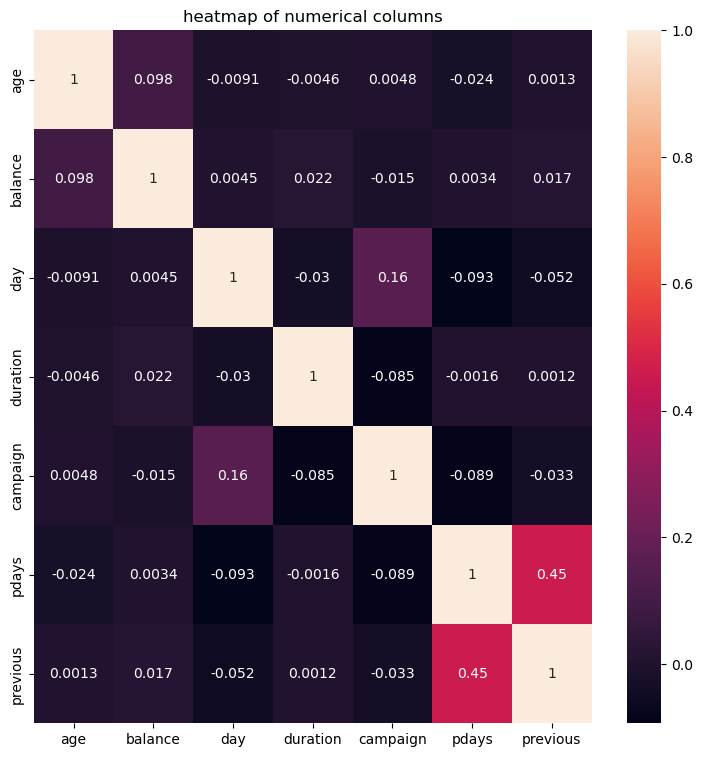

In [1928]:
# draw heatmap
plt.figure(figsize = (9,9))
sns.heatmap(df_num.corr(),annot= True)
plt.title('heatmap of numerical columns')

**Answer2: pdays and previous**

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.



In [1931]:
# apply lambda function to perform target encoding
df_in['y'] = df_in['y'].apply(lambda x : 1 if x == 'yes' else 0)
df_in

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [1932]:
# split the dataset int train/val/test into 60%/20%/20% ratio.
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df_in, test_size= 0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state =  42)


In [1933]:
df_full_train = df_train_full.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [1934]:
y_full_train = df_full_train.y.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [1935]:
del df_full_train['y']
del df_train['y']
del df_val['y']
del df_test['y'] 

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`


In [1937]:
# select categorical columns
categorical_columns_selector = selector(dtype_include=object)

categorical_columns = categorical_columns_selector(df_in)

categorical_columns

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [1938]:
from sklearn.metrics import mutual_info_score

In [1939]:
# define mutual information function
def mutual_info_y_score(series):
    return mutual_info_score(series, y_train)

In [1940]:
mi = df_train[categorical_columns].apply(mutual_info_y_score)
mi.sort_values(ascending = False).round(2)

poutcome     0.03
month        0.03
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

**Answer3: poutcome**

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9




In [1943]:
# perform one hot encoding using DictVectorizer
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

# convert df_train into dict
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
dv.get_feature_names_out()


array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [1944]:
# train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [1945]:
# ohe on validation
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [1946]:
# fit X_val
y_pred = model.predict(X_val)

In [1947]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val,y_pred).round(2)
print(f'accuracy is :',accuracy)

accuracy is : 0.9


**Answer4: 0.9**

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.




In [1949]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [1976]:
# Apply the feature elimination technique.
org_score = accuracy
scores = pd.DataFrame(columns=['removed_feature', 'accuracy', 'accuracy_difference'])
for i in features:
    index = features.copy()
    index.remove(i)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[index].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[index].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val,y_pred)
    
    scores.loc[len(scores)] = [i, score, org_score - score]

In [1977]:
scores

,removed_feature,accuracy,accuracy_difference
0,age,0.901017,-0.001017
1,job,0.900907,-0.000907
2,marital,0.901017,-0.001017
3,education,0.901128,-0.001128
4,balance,0.900686,-0.000686
5,housing,0.899801,0.000199
6,contact,0.900354,-0.000354
7,day,0.901349,-0.001349
8,month,0.899801,0.000199
9,duration,0.889737,0.010263


In [1965]:

min_acc = scores.accuracy_difference.min()
scores[scores.accuracy_difference == min_acc]

,removed_feature,accuracy,accuracy_difference
7,day,0.901349,-0.001349


**Answer5:Marital**

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.



In [1969]:
scores = {}
for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[c] = round(score, 3)
    print(f'C = {c}:\t RMSE = {score}')

C = 0.01:	 RMSE = 0.8913957089139571
C = 0.1:	 RMSE = 0.8931652289316523
C = 1:	 RMSE = 0.893607608936076
C = 10:	 RMSE = 0.893607608936076
C = 100:	 RMSE = 0.893607608936076


In [1971]:
scores

{0.01: 0.891, 0.1: 0.893, 1: 0.894, 10: 0.894, 100: 0.894}

In [1973]:
print('the smallest c is',min(scores,key=scores.get))

the smallest c is 0.01


**Answer6:0.01**

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw03
* If your answer doesn't match options exactly, select the closest one